# SVR Model

## Data Prepatration

We begin by mounting the drive so we can take the needed datasets. 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


We import the needed libraries. 

In [ ]:
#Load Libraries
import numpy 
import matplotlib.pyplot as plt
import pandas

We format our training and testing X and y data. 

In [ ]:
x_train = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_train.csv')
y_train = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_train.csv')
features = ['whc', 'silt', 'silt', 'clay',	'om',	'kwfactor',	'kffactor',	'spH',
            'tfactor',	'Yearly Precipitation',	'Yearly Average Temperature','Value of Previous Year']
target = ['Value']

In [ ]:
x_test = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_test.csv')
y_test = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_test.csv')

In [ ]:
x_train= x_train.drop(columns=['Unnamed: 0'])
x_test= x_test.drop(columns=['Unnamed: 0'])

In [ ]:
print(x_train.shape) 
print(y_train.shape)

(72432, 32)
(72432, 2)


In [ ]:
print(f'We have {x_train.shape[0]} train samples')
print(f'We have {x_test.shape[0]} test samples')

We have 72432 train samples
We have 18108 test samples


We format the output Y value data. 

In [ ]:
y_train= y_train.iloc[:,1:2]
y_train.head()
print(y_train.shape)

y_test= y_test.iloc[:,1:2]
#y_test.head()

(72432, 1)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(72432, 31)
(18108, 31)
(72432, 1)
(18108, 1)


In [ ]:
x_train= x_train.values
x_test= x_test.values

In [ ]:
y_train= y_train.values
y_test= y_test.values

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(72432, 31)
(18108, 31)
(72432, 1)
(18108, 1)


In [ ]:
print(x_train)

[[3.76400000e+03 2.89480228e-01 1.42917500e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.62330000e+04 2.17565759e-01 5.75414663e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [7.47340000e+04 2.49766420e-01 3.85797558e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [7.04280000e+04 2.09308420e-01 3.94414037e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.20150000e+04 2.61962988e-01 1.92985241e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.89700000e+04 3.16360888e-01 1.19897226e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [ ]:
# import seaborn as sns

# data = pd.concat((x_train, x_test)).reset_index(drop = True)

# plt.figure()
# sns.heatmap(data.corr(), cmap='coolwarm')
# plt.show()

## First Trial of SVR Model 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We fit the model on our training data. 

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
# regressor = SVR(kernel = 'rbf', C=10, gamma=0.001) best params 
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

We generate predictions using our model on the test data. 

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([29.60689286, 36.49368417, 38.17393064, ..., 30.20518131,
       39.48831798, 33.84192281])

We make a new dataframe and put the real target Y values and the predicted ones as columns so we can compare them easily. 

In [ ]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,28.0,29.606893
1,27.0,36.493684
2,35.0,38.173931
3,23.3,36.214203
4,66.2,39.234206
...,...,...
18103,24.0,22.051877
18104,30.0,28.780179
18105,31.9,30.205181
18106,36.4,39.488318


### Graphs of Y pred vs. Y actual and Results

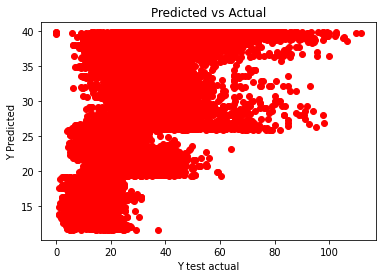

In [ ]:
plt.scatter(df['Real Values'], df['Predicted Values'], color = 'red')
plt.title('Predicted vs Actual')
plt.xlabel('Y test actual')
plt.ylabel('Y Predicted')
plt.show()

We plot a density plot so we can see where most of the data is situated, where our aim is to have it situated around the y=x bisector meaning that the predicted values are as close as possible to the actual ones. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


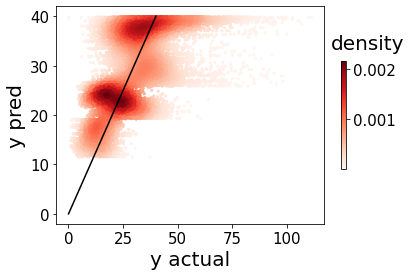

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([df['Real Values'], df['Predicted Values']])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()

plt.scatter(df['Real Values'], df['Predicted Values'], c=z, s=10, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 15,family = 'Times New Roman')
plt.yticks(size = 15,family = 'Times New Roman')
plt.xlabel('y actual',size = 20,family = 'Times New Roman')
plt.ylabel('y pred',size = 20,family = 'Times New Roman')
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 20,family = 'Times New Roman')

x = np.linspace(0,40,40)
y = x
plt.plot(x, y, color='black' )

plt.show()


We get MAE, MSE, RMSE, and R2 to try and evaluate our model. 

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(df['Real Values'], df['Predicted Values'])
mse = metrics.mean_squared_error(df['Real Values'], df['Predicted Values'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(df['Real Values'],df['Predicted Values'])

# print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 9.492433199279692
MSE: 163.08958693520785
RMSE: 12.77065334801661
R-Squared: 0.31382796690840065


### Learning Curve 

We plot the Learning Curve of the model to study bias and variance. 

In [ ]:
from sklearn.model_selection import learning_curve

#train_sizes = [1, 100, 500, 2000, 5000, 7654]
train_sizes=np.linspace(0.01, 1.0, 50)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = SVR(kernel = 'rbf'),
X = x_train,
y = y_train, 
train_sizes = train_sizes, 
cv = 10,
scoring = 'neg_mean_squared_error')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pandas.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pandas.Series(validation_scores_mean, index = train_sizes))

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for the SVR model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

## Grid Search and Hyperparameter Tuning with Cross Validation 

We use grid search to try and find the optimal hyperparameters so that we can obtain the optimal performace of our model. 

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

We get the best params to be: 

C=1

Gama= 0.001

Kernel= rbf

We generate new predictions based on the newly fit regressor. 

In [ ]:
y_pred_new = grid.predict(x_test)
y_pred_new

In [ ]:
df_new = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred_new})
df_new

We plot a density plot so we can see where most of the data is situated, where our aim is to have it situated around the y=x bisector meaning that the predicted values are as close as possible to the actual ones. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([df_new['Real Values'], df_new['Predicted Values']])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()

plt.scatter(df_new['Real Values'], df_new['Predicted Values'], c=z, s=10, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 15,family = 'Times New Roman')
plt.yticks(size = 15,family = 'Times New Roman')
plt.xlabel('y actual',size = 20,family = 'Times New Roman')
plt.ylabel('y pred',size = 20,family = 'Times New Roman')
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 20,family = 'Times New Roman')

x = np.linspace(0,40,40)
y = x
plt.plot(x, y, color='black' )

plt.show()

We get MAE, MSE, RMSE, and R2 to try and evaluate our new model. 



In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(df_new['Real Values'], df_new['Predicted Values'])
mse = metrics.mean_squared_error(df_new['Real Values'], df_new['Predicted Values'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(df_new['Real Values'],df_new['Predicted Values'])

# print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

## SVR on Selected Features

We now perform SVR on the top selected features. 

We take the top 3 so that we can visualize them on the 3D plane. 

In [ ]:
x_train_selected = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_train.csv')
y_train = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_train.csv')

In [ ]:
x_train_selected = x_train_selected[["Crossed Weather", "Value of Previous Year", "Yearly Precipitation"]]

In [ ]:
x_test_selected = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_test.csv')
y_test = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_test.csv')

In [ ]:
x_test_selected = x_test_selected[["Crossed Weather", "Value of Previous Year", "Yearly Precipitation"]]

In [ ]:
y_train= y_train.iloc[:, 1:2]
y_test= y_test.iloc[:, 1:2]

In [ ]:
print(x_train_selected.shape)
print(x_test_selected.shape)
print(y_train.shape)
print(y_test.shape)

(69809, 3)
(17453, 3)
(69809, 1)
(17453, 1)


In [ ]:
from sklearn.svm import SVR

regressor_selected = SVR(kernel = 'rbf', C=10, gamma=0.001)

regressor_selected.fit(x_train_selected, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, gamma=0.001)

In [ ]:
y_pred_selected = regressor_selected.predict(x_test_selected)
y_pred_selected

array([40.93208446, 62.17708857, 23.15306725, ..., 25.07207909,
       34.34361138, 29.23878779])

In [ ]:
print(y_test)

       Value
0       32.5
1       39.0
2       50.0
3       52.8
4       20.3
...      ...
17448   27.9
17449    8.0
17450   19.0
17451   18.3
17452   42.0

[17453 rows x 1 columns]


In [ ]:
df_selected = pandas.DataFrame({'Real Values':y_test.values.reshape(-1), 'Predicted Values':y_pred_selected})
df_selected

,Real Values,Predicted Values
0,32.5,40.932084
1,39.0,62.177089
2,50.0,23.153067
3,52.8,44.855369
4,20.3,10.218078
...,...,...
17448,27.9,32.405494
17449,8.0,13.720369
17450,19.0,25.072079
17451,18.3,34.343611


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


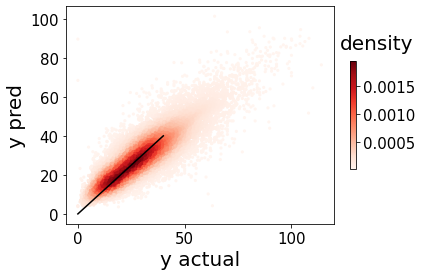

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([df_selected['Real Values'], df_selected['Predicted Values']])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()

plt.scatter(df_selected['Real Values'], df_selected['Predicted Values'], c=z, s=10, edgecolor='',cmap = 'Reds')
plt.tick_params(labelsize=15)
plt.xticks(size = 15,family = 'Times New Roman')
plt.yticks(size = 15,family = 'Times New Roman')
plt.xlabel('y actual',size = 20,family = 'Times New Roman')
plt.ylabel('y pred',size = 20,family = 'Times New Roman')
cb = plt.colorbar(shrink = 0.5)
cb.ax.tick_params(labelsize=15)
for l in cb.ax.yaxis.get_ticklabels():
       l.set_family('Times New Roman')
plt.figtext(0.76,0.73,'density',size = 20,family = 'Times New Roman')

x = np.linspace(0,40,40)
y = x
plt.plot(x, y, color='black' )

plt.show()

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(df_selected['Real Values'], df_selected['Predicted Values'])
mse = metrics.mean_squared_error(df_selected['Real Values'], df_selected['Predicted Values'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(df_selected['Real Values'],df_selected['Predicted Values'])

# print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 5.939178605862768
MSE: 63.84862228241935
RMSE: 7.990533291490584
R-Squared: 0.7246895160561104


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib import pyplot
from matplotlib.mlab import griddata
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
print(x_train_selected)

       Crossed Weather  Value of Previous Year  Yearly Precipitation
0            -0.554195               -0.325183             -0.378872
1             4.200007               -1.582330             -1.869119
2            -0.205751               -1.125787             -0.472953
3            -0.329894               -0.569996             -0.226084
4             2.007439                1.276025             -0.923790
...                ...                     ...                   ...
69804         2.253433               -0.285484             -1.352801
69805         1.944740               -0.298717             -1.562790
69806        -1.146399                2.447157             -1.034430
69807         1.470399               -0.927290             -1.406992
69808        -0.009908                0.012262              0.011001

[69809 rows x 3 columns]


In [ ]:
#displaying the 3D graph
x = x_train_selected[:, :0]
y = x_train_selected[:, :1]
z = y_test
zp = y_pred_selected #the predictions

xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))
X, Y = np.meshgrid(xi, yi)
ZP = scipy.interpolate.griddata(x, y, zp, xi, yi)

fig = pyplot.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, ZP, rstride=1, cstride=1, facecolors=cm.jet(ZP/3200), linewidth=0, antialiased=True)
ax.scatter(x, y, z)
ax.set_zlim3d(np.min(z), np.max(z))
colorscale = cm.ScalarMappable(cmap=cm.jet)
colorscale.set_array(z)
fig.colorbar(colorscale)
pyplot.show()

In [ ]:
# Create a 3D scatter plot
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization\

fig = px.scatter_3d(x_train_selected, x=x_test_selected['Crossed Weather'].values, y=x_test_selected["Value of Previous Year"].values, z=y_pred_selected, 
                 opacity=0.8, color_discrete_sequence=['black'])

# Set figure title
fig.update_layout(title_text="Scatter 3D Plot",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey',
                                          ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='lightgrey')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()